In [3]:
%pip install pandas
%pip install shap
%pip install scikit-learn
%pip install xgboost
%pip install joblib
%pip install pyarrow
%pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rafae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rafae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rafae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rafae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rafae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ------ --------------------------------- 4.2/25.1 MB 25.2 MB/s eta 0:00:01
   ----------------- ---------------------- 11.3/25.1 MB 29.4 MB/s eta 0:00:01
   ------------------------------ --------- 18.9/25.1 MB 31.3 MB/s eta 0:00:01
   ---------------------------------------- 25.1/25.1 MB 30.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rafae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.2 MB/s eta 0:00:00
Failed to build fastparquet
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for fastparquet (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [136 lines of output]
      fatal: not a git repository (or any of the parent directories): .git
      C:\Users\rafae\AppData\Local\Temp\pip-build-env-2jpb1go5\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      Traceback (most recent call last):
        File "C:\Users\rafae\AppData\Local\Temp\pip-build-env-2jpb1go5\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
          section = defn.get("tool", {})[tool_name]
                    ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
      KeyError: 'setuptools_scm'
      running bdist_wheel
      running build
      running build_p

In [1]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score   
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import xgboost as xgb
import joblib

C:\Users\rafae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_parquet("data\cic-collection.parquet")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rafae\AppData\Local\Temp\ipykernel_20652\3152213118.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_parquet("data\cic-collection.parquet")


In [3]:
X = df.drop(['Label','ClassLabel'], axis=1)
# Get the Categorical object
categories = pd.Categorical(df['Label'])

# Print the mapping
for code, category in enumerate(categories.categories):
    print(f"{code}: {category}")
y = df['Label']
#label encoding 

y = pd.Categorical(y).codes


0: Benign
1: Botnet
2: Bruteforce-FTP
3: Bruteforce-SSH
4: DDoS
5: DDoS-DNS
6: DDoS-Ddossim
7: DDoS-HOIC
8: DDoS-LDAP
9: DDoS-LOIC-HTTP
10: DDoS-MSSQL
11: DDoS-NTP
12: DDoS-NetBIOS
13: DDoS-SNMP
14: DDoS-Slowloris
15: DDoS-Syn
16: DDoS-TFTP
17: DDoS-UDP
18: DDoS-UDPLag
19: DoS-Goldeneye
20: DoS-Heartbleed
21: DoS-Hulk
22: DoS-Rudy
23: DoS-Slowbody
24: DoS-Slowheaders
25: DoS-Slowhttptest
26: DoS-Slowloris
27: DoS-Slowread
28: Infiltration
29: Portscan
30: Webattack-SQLi
31: Webattack-XSS
32: Webattack-bruteforce


In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
model = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=df['Label'].nunique(),
    device='cuda'
)
model.fit(X_train,Y_train)
joblib.dump(model, 'xgb_model.joblib')

['xgb_model.joblib']

In [7]:
y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

C:\Users\rafae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


         Flow Duration  Total Fwd Packets  Total Backward Packets  \
4172603           1117                  5                       2   
2403103       71066989                 39                      73   
6144422        4398539                  5                       3   
4594999           1002                  4                       0   
7798266            479                  1                       1   
...                ...                ...                     ...   
188844           23551                  1                       1   
3805020          13826                  3                       4   
1861861         319906                 22                      22   
2755504         486321                  3                       4   
4043237           8078                  5                       2   

         Fwd Packets Length Total  Bwd Packets Length Total  \
4172603                     935.0                     349.0   
2403103                     264.0            

In [8]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

Accuracy: 0.9885
Precision (weighted): 0.9845
Recall (weighted): 0.9885
F1 Score (weighted): 0.9842


In [5]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the classifier
clf.fit(X_train, Y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


In [6]:
joblib.dump(clf, 'DecisionTree.joblib')

['DecisionTree.joblib']

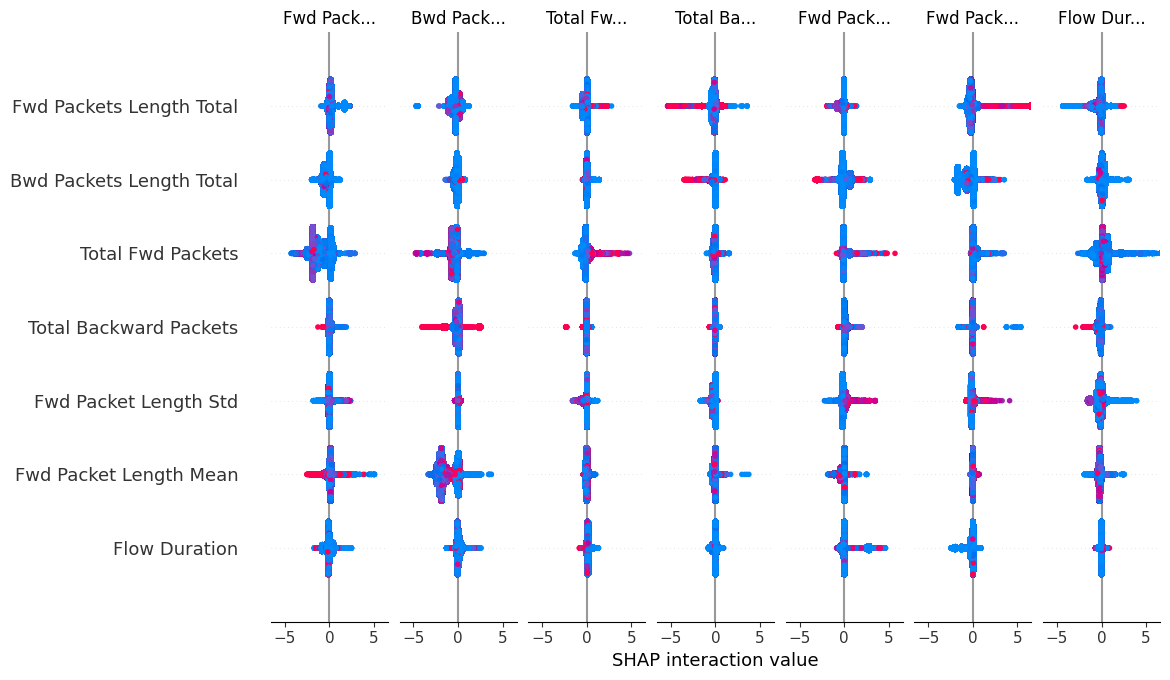

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:

"""
explainer = shap.TreeExplainer(model)  # Initialize the SHAP TreeExplainer
shap_values = explainer.shap_values(X_test)  # Compute SHAP values for test set

# Summary plot for global feature importance
shap.summary_plot(shap_values, X_test)

# For instance, explain the first prediction in the test set
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X_test.iloc[0, :],
    matplotlib=True  # Set to True to visualize in Jupyter Notebook
)

# Plot the dependence of a specific feature (e.g., 'FeatureName')
shap.dependence_plot('FeatureName', shap_values, X_test)
"""